In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

EDA

In [2]:
df = pd.read_csv('Concrete_data.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.rename(columns ={
    'Cement (component 1)(kg in a m^3 mixture)' :'cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash',
    'Water  (component 4)(kg in a m^3 mixture)':'water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'ca',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fa',
    'Age (day)':'age',
    'Concrete compressive strength(MPa, megapascals) ':'strength'  
}, inplace = True)

In [6]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,ca,fa,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
ca                    0
fa                    0
age                   0
strength              0
dtype: int64

In [8]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,ca,fa,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


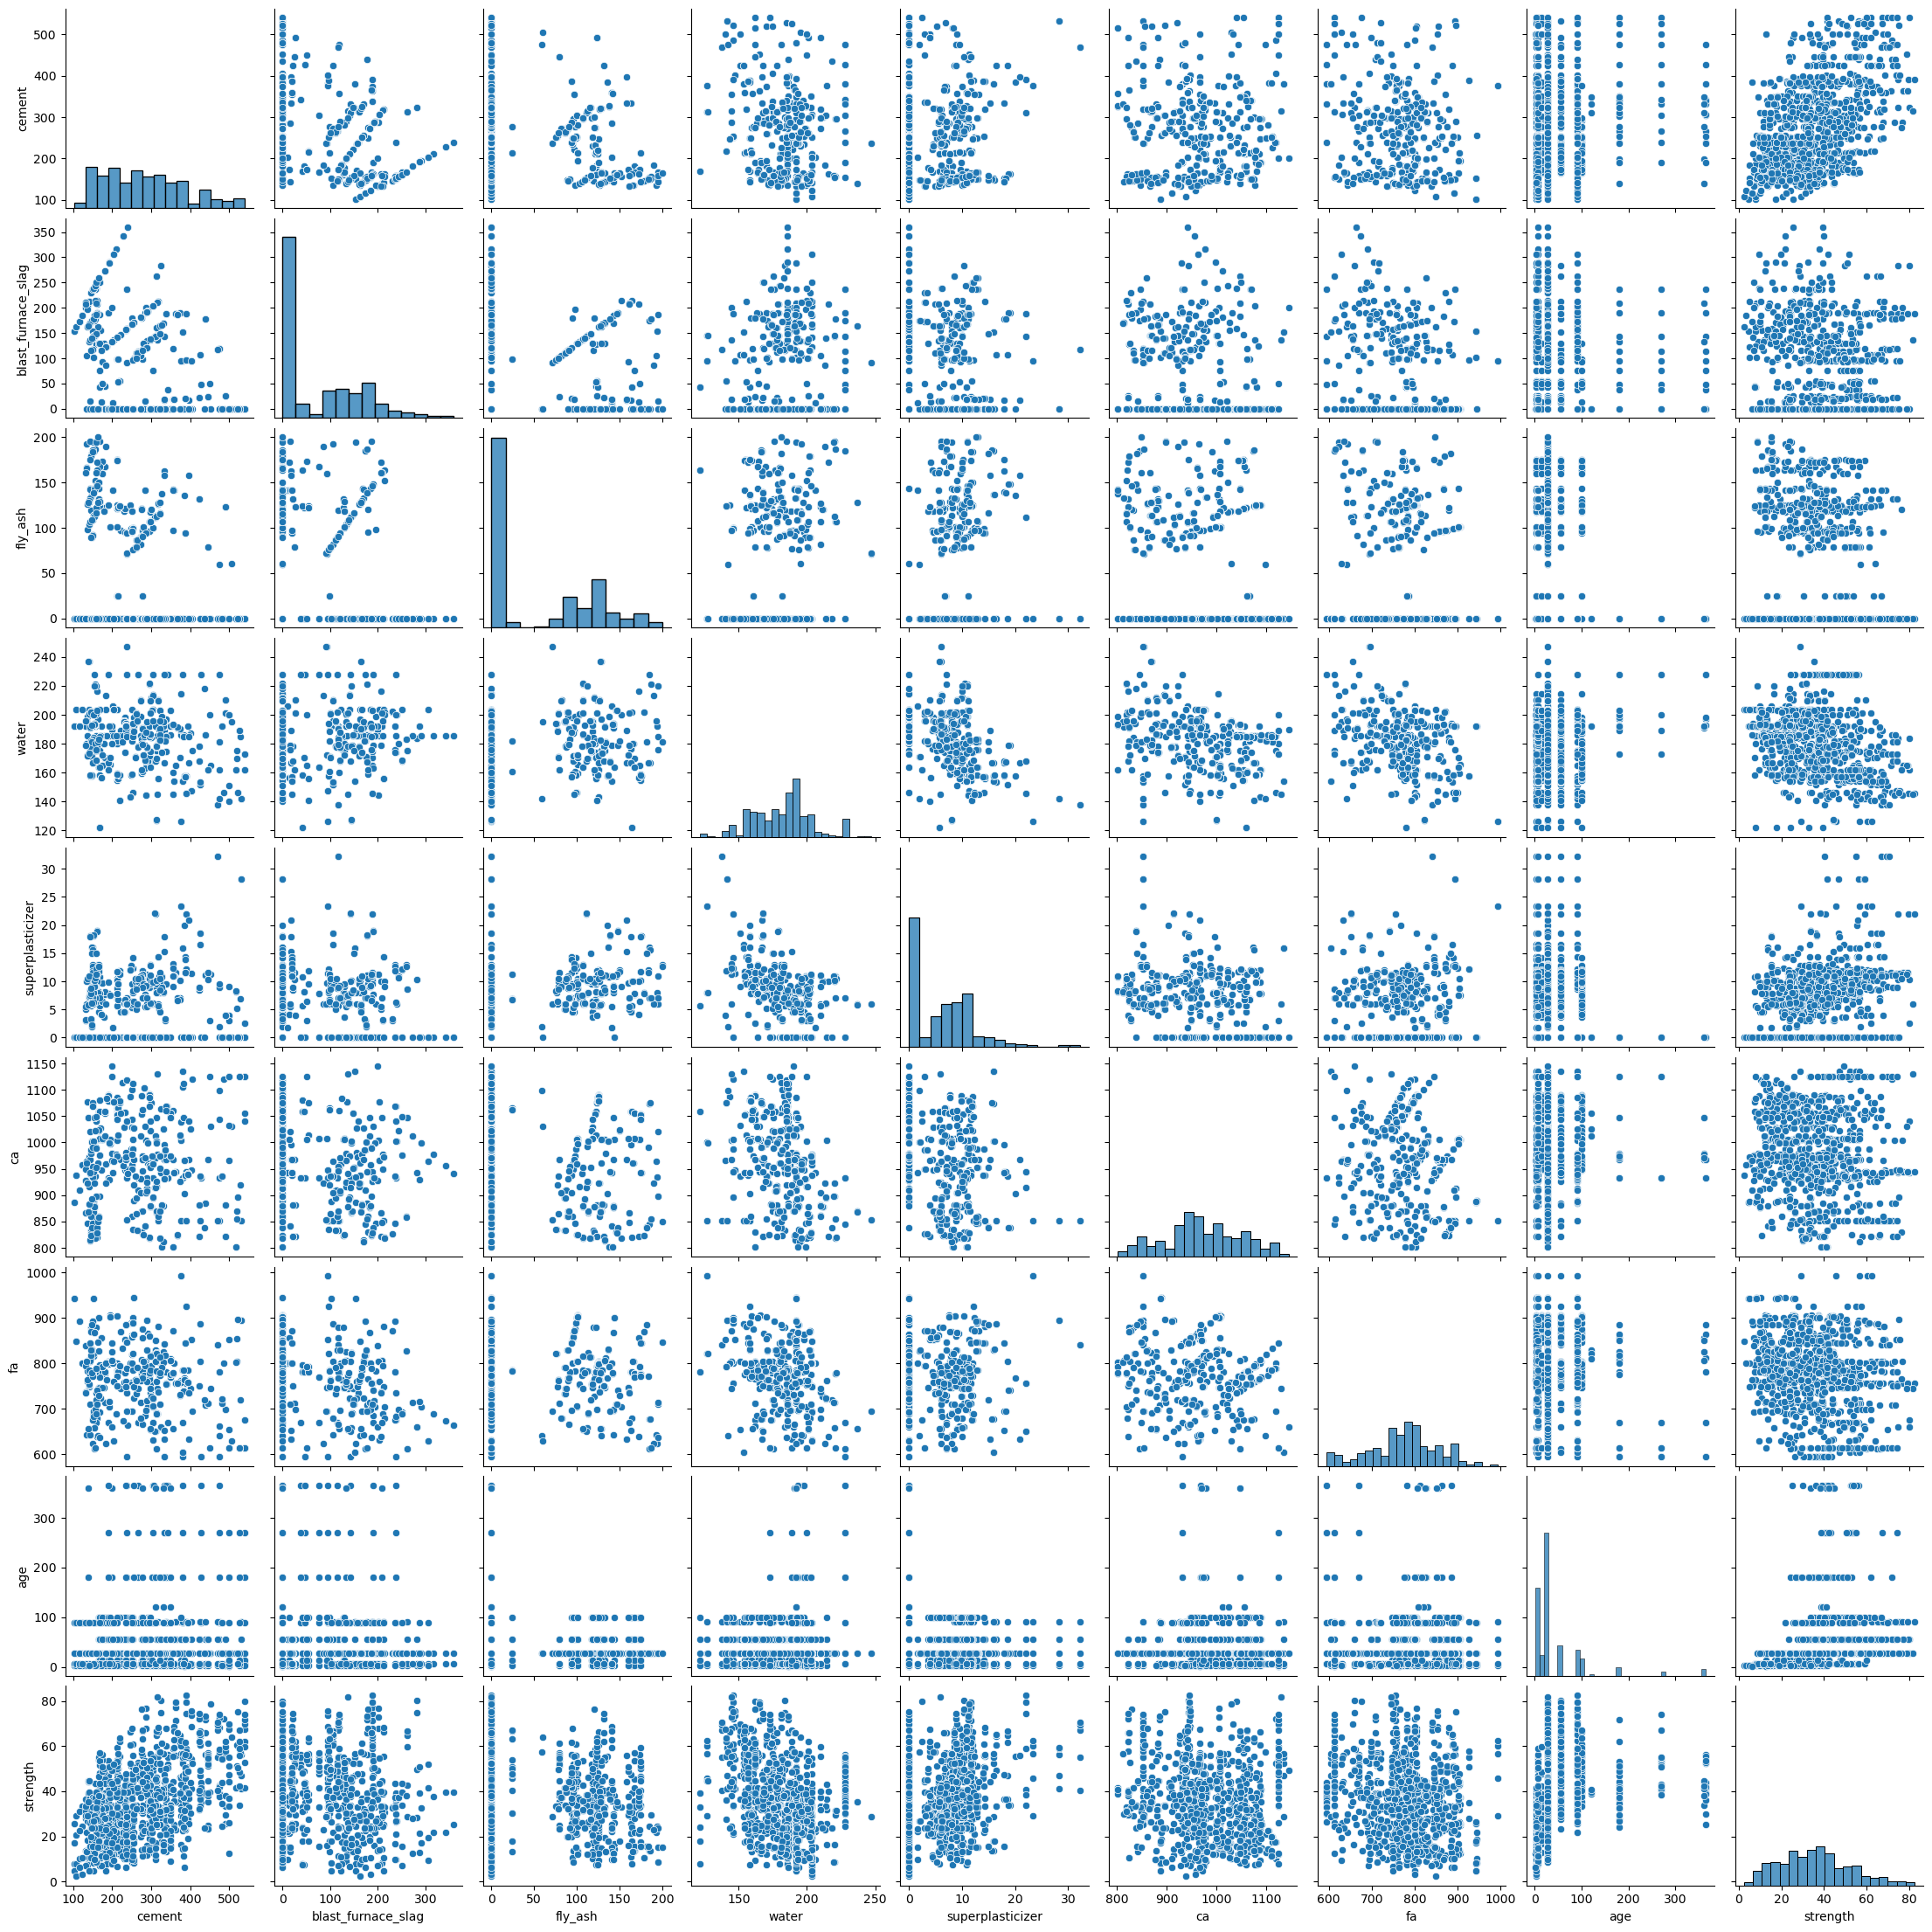

In [9]:
sns.pairplot(df)

Feature Engineeering

In [10]:
y = df['strength']

In [11]:
x = df.drop(['strength'], axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size =0.25, random_state =42)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
x_test_scaled = scaler.transform(x_test)

Model Selection

In [17]:
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
models = {
    'lr':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'kn':KNeighborsRegressor(),
    'rf':RandomForestRegressor(),
    'gb':GradientBoostingRegressor()
}

In [19]:
for i in range(len(list(models))):
    model = list(models.values())[i]

In [20]:
model.fit(x_train_scaled,y_train)

GradientBoostingRegressor()

In [21]:
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

In [22]:
from sklearn.metrics import r2_score

In [23]:
training_accuracy = r2_score(y_train, y_train_pred)
testing_accuracy = r2_score(y_test, y_test_pred)

In [24]:
# Make sure you already did something like this before
for name, model in models.items():
    model.fit(x_train_scaled, y_train)

# Later, in your accuracy-check loop:
for name, model in models.items():
    y_train_pred = model.predict(x_train_scaled)
    y_test_pred = model.predict(x_test_scaled)
    
    print(f"Model: {name}")
    print(f"  R2 Score (Train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"  R2 Score (Test):  {r2_score(y_test, y_test_pred):.4f}")
    print("-" * 40)


Model: lr
  R2 Score (Train): 0.6099
  R2 Score (Test):  0.6250
----------------------------------------
Model: svr
  R2 Score (Train): 0.6790
  R2 Score (Test):  0.6381
----------------------------------------
Model: ridge
  R2 Score (Train): 0.6099
  R2 Score (Test):  0.6252
----------------------------------------
Model: lasso
  R2 Score (Train): 0.5673
  R2 Score (Test):  0.5576
----------------------------------------
Model: kn
  R2 Score (Train): 0.8179
  R2 Score (Test):  0.7162
----------------------------------------
Model: rf
  R2 Score (Train): 0.9849
  R2 Score (Test):  0.8942
----------------------------------------
Model: gb
  R2 Score (Train): 0.9473
  R2 Score (Test):  0.8881
----------------------------------------


In [25]:
#final model selected as random forest 

In [26]:
final_model = RandomForestRegressor()

In [27]:
final_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [28]:
y_train_pred = final_model.predict(x_train_scaled)
y_test_pred = final_model.predict(x_test_scaled)

In [29]:
training_accuracy = r2_score(y_train, y_train_pred)
testing_accuracy = r2_score(y_test, y_test_pred)

In [30]:
training_accuracy

0.9853043871749639

In [31]:
testing_accuracy

0.8890997608245226

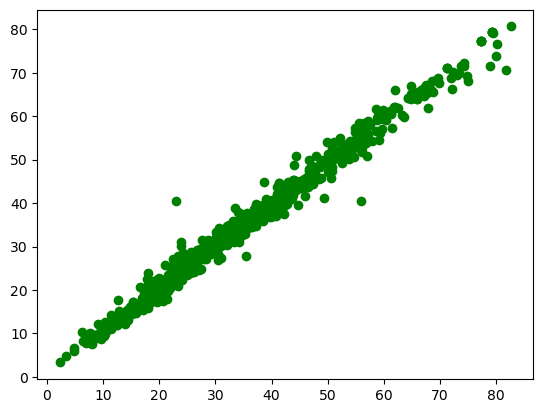

In [32]:
plt.scatter(y_train,y_train_pred, c='g')

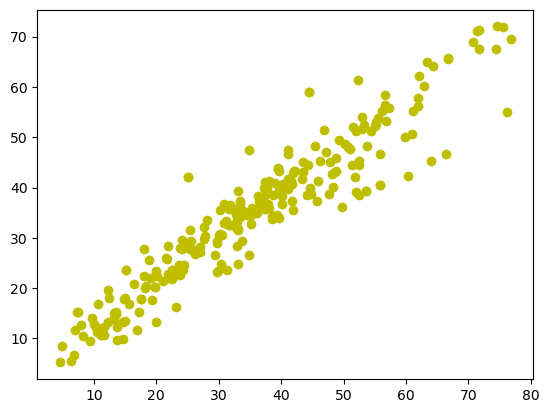

In [33]:
plt.scatter(y_test,y_test_pred, c='y')

Prediction using new data

In [69]:
import pandas as pd


new_data = pd.DataFrame([{
    'cement': 500.0,  # Cement (component 1)(kg in a m^3 mixture)
    'blast_furnace_slag': 0.0, # Blast Furnace Slag (component 2)(kg in a m^3 mixture)
    'fly_ash': 0.0, # Fly Ash (component 3)(kg in a m^3 mixture)
    'water': 200.0, # Water  (component 4)(kg in a m^3 mixture)
    'superplasticizer': 1.0, # Superplasticizer (component 5)(kg in a m^3 mixture)
    'ca': 700.0, # Coarse Aggregate  (component 6)(kg in a m^3 mixture)
    'fa': 800.0, # Fine Aggregate (component 7)(kg in a m^3 mixture)
    'age': 28 # Age (day)
}])


new_data_scaled = scaler.transform(new_data)


predicted_strength_of_concrete = final_model.predict(new_data_scaled)

print(f"Predicted Strength of Concrete: {predicted_strength_of_concrete[0]:.2f} MPa")


Predicted Strength of Concrete: 44.59 MPa
